In [1]:
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [40]:
life_expancy_data = pd.read_csv("./data_csv/cdc-life-expectancy.csv", index_col=0)
data.keys()

Index(['M', 'F'], dtype='object')

In [3]:
data_list = []
all_data = pd.DataFrame()
for f in glob.glob("./data_txt/*.txt"):
    df = pd.read_csv(f, sep=',', header=None)
    df["year"] = int(f[14:18])
    all_data = all_data.append(df, ignore_index=True)

all_data.columns = (["name", "sex", "number", "year"])
print(all_data)

              name sex  number  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1957041      Zylas   M       5  2018
1957042      Zyran   M       5  2018
1957043      Zyrie   M       5  2018
1957044      Zyron   M       5  2018
1957045      Zzyzx   M       5  2018

[1957046 rows x 4 columns]


In [7]:
#Most popular male name 2009-2018
#wybrać np 20 najpopularniejszych imion i sprawdzić ile miejsc zajmują M/F
#Sprawdzić różnorodność imion w sensie ile imion żeńskich ile męskich 
#i porównać to do ogólnej liczby urodzeń odpowiedniej płci
data09_18 = all_data[all_data["year"] <= 2018 ]
data09_18 = data09_18[data09_18["year"] >= 2009]
data09_18 = data09_18.drop(columns = "year")
#data09_18 = data09_18[data09_18["sex"] == "M"]
#data09_18 = data09_18.groupby("name").sum()
#data09_18.index[data09_18["number"].argmax()]
data09_18_M = data09_18[data09_18["sex"] == "M"]
data09_18_M = data09_18_M.groupby("name").sum()
data09_18_M = data09_18_M.sort_values(by='number', ascending=False)
print(data09_18_M)
data09_18_M.index[data09_18_M["number"].argmax()]
#data09_18.index[data09_18["number"].argmax(), ["sex"] == "M"]

           number
name             
Noah       180904
Jacob      173195
William    163811
Liam       161558
Ethan      157359
...           ...
Javere          5
Thorbjorn       5
Javez           5
Dailey          5
Sayhan          5

[25604 rows x 1 columns]


'Noah'

In [8]:
#Most popular female name 2009-2018
data09_18_F = data09_18[data09_18["sex"] == "F"]
data09_18_F = data09_18_F.groupby("name").sum()
data09_18_F = data09_18_F.sort_values(by='number', ascending=False)
print(data09_18_F)
data09_18_F.index[data09_18_F["number"].argmax()]

               number
name                 
Emma           195305
Sophia         183930
Olivia         183016
Isabella       179015
Ava            156852
...               ...
Naiima              5
Aramide             5
Elizabethanne       5
Elizabel            5
Kayleemarie         5

[34967 rows x 1 columns]


'Emma'

In [20]:
#Total number of names in years and diff between Male and Female names 2009-2018
index_F = data09_18_F.index
num_of_rows_F = len(index_F)
index_M = data09_18_M.index
num_of_rows_M = len(index_M)
total_diff_of_names = num_of_rows_F - num_of_rows_M
total_num_of_names = num_of_rows_F + num_of_rows_M
print("Number of female names: ",num_of_rows_F, "and male names: ", num_of_rows_M)
print("Total number of names in the years 2009-2018: ", total_num_of_names)
print("Total difference in number of F/M names: ", total_diff_of_names)

Number of female names:  34967 and male names:  25604
Total number of names in the years 2009-2018:  60571
Total difference in number of F/M names:  9363


In [45]:
data90_00 = all_data[all_data["year"] <= 2000 ]
data90_00 = data90_00[data90_00["year"] >= 1990]
data90_00 = data90_00.drop(columns = "year")
data90_00 = data90_00.groupby("sex").sum()
print("Total number of births in years 1990-2000")
print(data90_00)

Total number of births in years 1990-2000
       number
sex          
F    19816748
M    21437454


In [48]:
data2 = all_data.groupby("year").sum()
num_of_births = pd.merge(data2, life_expancy_data, on=['year'])
print(num_of_births)

       number   M   F
year                 
1930  2223273  58  62
1931  2104141  58  62
1932  2111167  58  62
1933  1999219  58  62
1934  2076590  58  62
...       ...  ..  ..
2008  3927263  75  80
2009  3816543  75  80
2010  3691821  76  81
2011  3653166  76  81
2012  3652146  76  81

[83 rows x 3 columns]


In [25]:
Jakub = all_data[all_data["name"] == "Jakub"]
print(Jakub)
Jakub = Jakub[Jakub["year"] == 1997]
print(Jakub)

          name sex  number  year
902176   Jakub   M       5  1981
939669   Jakub   M       7  1983
999345   Jakub   M       8  1986
1021806  Jakub   M       6  1987
1041976  Jakub   M      10  1988
1088963  Jakub   M      14  1990
1114752  Jakub   M      11  1991
1137430  Jakub   M      32  1992
1162946  Jakub   M      35  1993
1188546  Jakub   M      44  1994
1214485  Jakub   M      47  1995
1240649  Jakub   M      51  1996
1267103  Jakub   M      66  1997
1294306  Jakub   M      88  1998
1322736  Jakub   M      73  1999
1352033  Jakub   M      76  2000
1381701  Jakub   M     121  2001
1412081  Jakub   M     125  2002
1443057  Jakub   M     122  2003
1474492  Jakub   M     151  2004
1507016  Jakub   M     135  2005
1540322  Jakub   M     168  2006
1574929  Jakub   M     174  2007
1609748  Jakub   M     184  2008
1644748  Jakub   M     145  2009
1679063  Jakub   M     147  2010
1713187  Jakub   M     106  2011
1747044  Jakub   M     106  2012
1780601  Jakub   M      97  2013
1813872  J

In [26]:
Michal = all_data[all_data["name"] == "Michal"]
print(Michal)
Michal = Michal[Michal["year"] == 1997]
print(Michal)

           name sex  number  year
98358    Michal   M       5  1911
104066   Michal   M       7  1912
111604   Michal   M       5  1913
118176   Michal   M      10  1914
128384   Michal   M       6  1915
...         ...  ..     ...   ...
1882814  Michal   M      22  2016
1895690  Michal   F      49  2017
1917746  Michal   M      12  2017
1929038  Michal   F      36  2018
1948706  Michal   M      16  2018

[175 rows x 4 columns]
           name sex  number  year
1251534  Michal   F      65  1997
1267245  Michal   M      58  1997


In [27]:
Jacob = all_data[all_data["name"] == "Jacob"]
Jacob = Jacob.sort_values(by="number", ascending=False)
print(Jacob)

          name sex  number  year
1292956  Jacob   M   36016  1998
1321201  Jacob   M   35363  1999
1350465  Jacob   M   34477  2000
1265546  Jacob   M   34153  1997
1380555  Jacob   M   32545  2001
...        ...  ..     ...   ...
143696   Jacob   F       5  1917
153863   Jacob   F       5  1918
174778   Jacob   F       5  1920
185690   Jacob   F       5  1921
720224   Jacob   F       5  1971

[199 rows x 4 columns]


In [28]:
#Year that this name become almost strictly male name

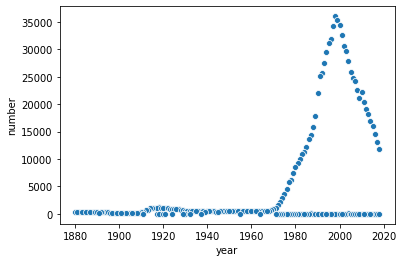

In [29]:
sns.scatterplot(x="year",y="number",data=Jacob)

In [30]:
#Funfact: Michael Jackson was born in 1958 in the top years of these name
Michael = all_data[all_data["name"] == "Michael"]
Michael = Michael.sort_values(by="number", ascending=False)
print(Michael)

           name sex  number  year
544630  Michael   M   92704  1957
533165  Michael   M   90656  1956
556204  Michael   M   90517  1958
510812  Michael   M   88528  1954
521887  Michael   M   88327  1955
...         ...  ..     ...   ...
100725  Michael   F       8  1912
44276   Michael   F       7  1897
95684   Michael   F       7  1911
86612   Michael   F       7  1909
75248   Michael   F       5  1906

[251 rows x 4 columns]


In [31]:
#Year that this name become almost strictly male name

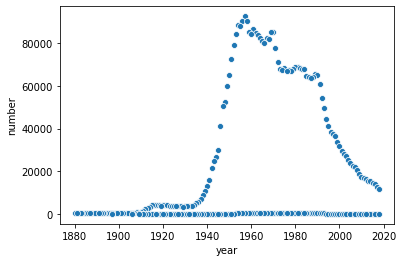

In [32]:
sns.scatterplot(x="year",y="number",data=Michael)

In [35]:
#Difference between popularity of both names
#Może dodamy wykres z tymi imionami na osi czasu?
Jacobsum = Jacob.drop(columns = "year")
Jacobsum = Jacobsum.groupby("name").sum()
Michaelsum = Michael.drop(columns = "year")
Michaelsum = Michaelsum.groupby("name").sum()
print([Jacobsum, Michaelsum])

[       number
name         
Jacob  933726,           number
name            
Michael  4384463]


In [ ]:
#Fajnie jakby dodać oba imiona na jednym wykresie